# <b><i><center><h3> Students Performance in Exams Dataset

- <b>Objective:
- <b>Predict a student’s math score based on other factors like gender, test preparation, parental education, and lunch type using regression techniques. Alternatively students can also predict if the student will pass or fail a threshold (classification task).

## <b><i><center> Model Function 

In [111]:
def Models(df, target_column, test_size):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures
    from sklearn.linear_model import LinearRegression, Lasso, Ridge
        
    data = df.copy()

    X = data.drop(columns=target_column)
    y = data[target_column]
    
    scale_cols = [col for col in ['race/ethnicity', 'math score', 'reading score', 'writing score', 'average_score', 'performance level'] if col in X.columns]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])
    X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])

    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    
    models = {
        'Linear Regression': LinearRegression(),
        'Lasso Regression': Lasso(),
        'Ridge Regression': Ridge(),
        'Polynomial Linear Regression': LinearRegression()
    }

    results = {}

    for name, model in models.items():
        
        if name == 'Polynomial Linear Regression':
            model.fit(X_train_poly, y_train)
            predictions = model.predict(X_test_poly)
            training_score = model.score(X_train_poly, y_train)
            testing_score = model.score(X_test_poly, y_test)
        else:
            model.fit(X_train_scaled, y_train)
            predictions = model.predict(X_test_scaled)
            training_score = model.score(X_train_scaled, y_train)
            testing_score = model.score(X_test_scaled, y_test)

        mse = mean_squared_error(y_true=y_test, y_pred=predictions)
        mae = mean_absolute_error(y_true=y_test, y_pred=predictions)
        rmse = root_mean_squared_error(y_true=y_test, y_pred=predictions)  
        
        results[name] = {
            'Mean Squared Error': mse,
            'Mean Absolute Error': mae,
            'Root Mean Squared Error': rmse,
            'Training Accuracy': testing_score,
            'Testing Accuracy': training_score
        }
    
    return pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

## <b><i><center> Model Evaluation Function 

In [145]:
def plot_metric(result):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    df_melted = result.melt(id_vars='Model', var_name='Metric', value_name='Score')
    
    plt.figure(figsize=(13, 7))
    ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='Set2', dodge=True, width=0.8)

    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)

    plt.title('Model Evaluation Metric', fontsize=16, weight='bold')
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Score (Log Scale)', fontsize=12)
    plt.xticks(rotation=15, fontsize=10)
    plt.legend(title='Metric', loc='best', fontsize=10)
    
    ax.set_yscale('log')
    
    plt.tight_layout()
    plt.show()

## <b><i><center> Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# <b><i><center> Importing Dataset

#### <b><i> Step 1: Load the Data

In [113]:
data = pd.read_csv("./StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [114]:
data.shape

(1000, 8)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [116]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### <b><i>Step 2: Data Cleaning

In [117]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [118]:
data = data[~data.duplicated()]
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### <b><i>Step 3: Exploratory Data Analysis (EDA)

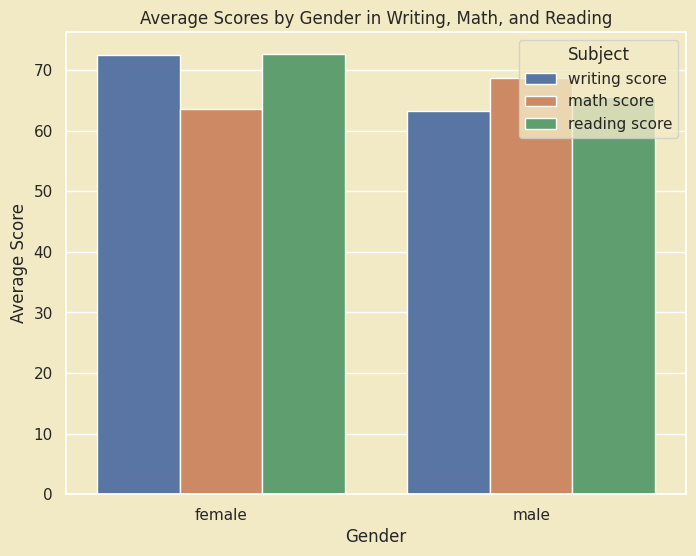

In [119]:
plt.figure(figsize=(8, 6))

avg_gender_score = data.groupby('gender')[['writing score', 'math score', 'reading score']].mean().reset_index()
avg_gender_score_melted = avg_gender_score.melt(id_vars="gender", var_name="Subject", value_name="Average Score")

sns.barplot(x="gender", y="Average Score", hue="Subject", data=avg_gender_score_melted)
plt.title("Average Scores by Gender in Writing, Math, and Reading")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.show()

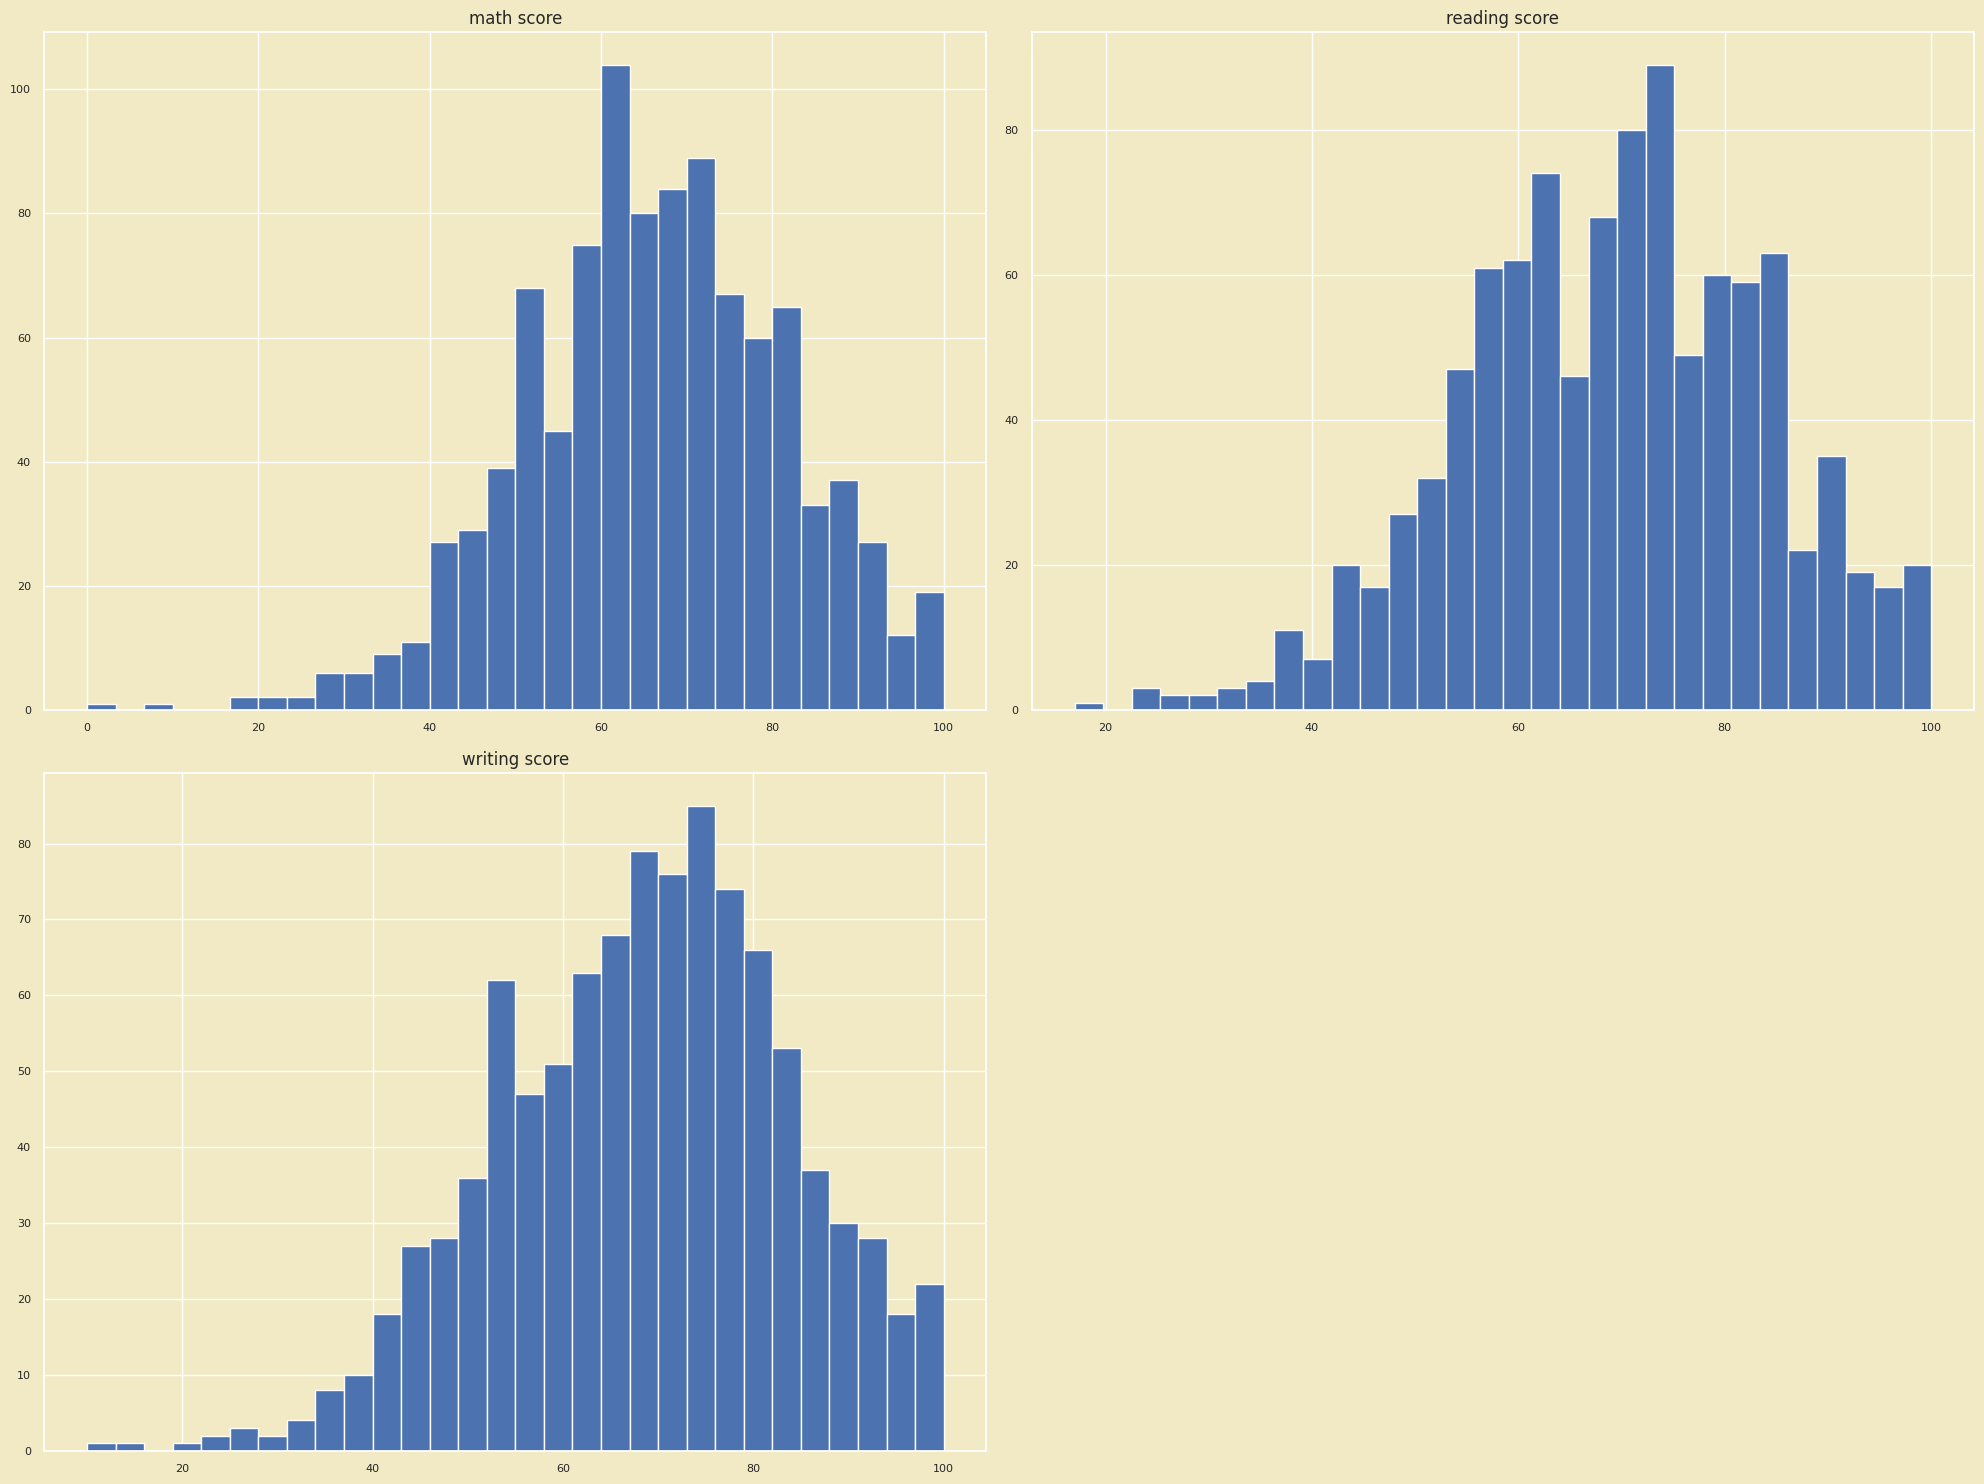

In [120]:
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
data.select_dtypes(exclude=['object', 'bool']).hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

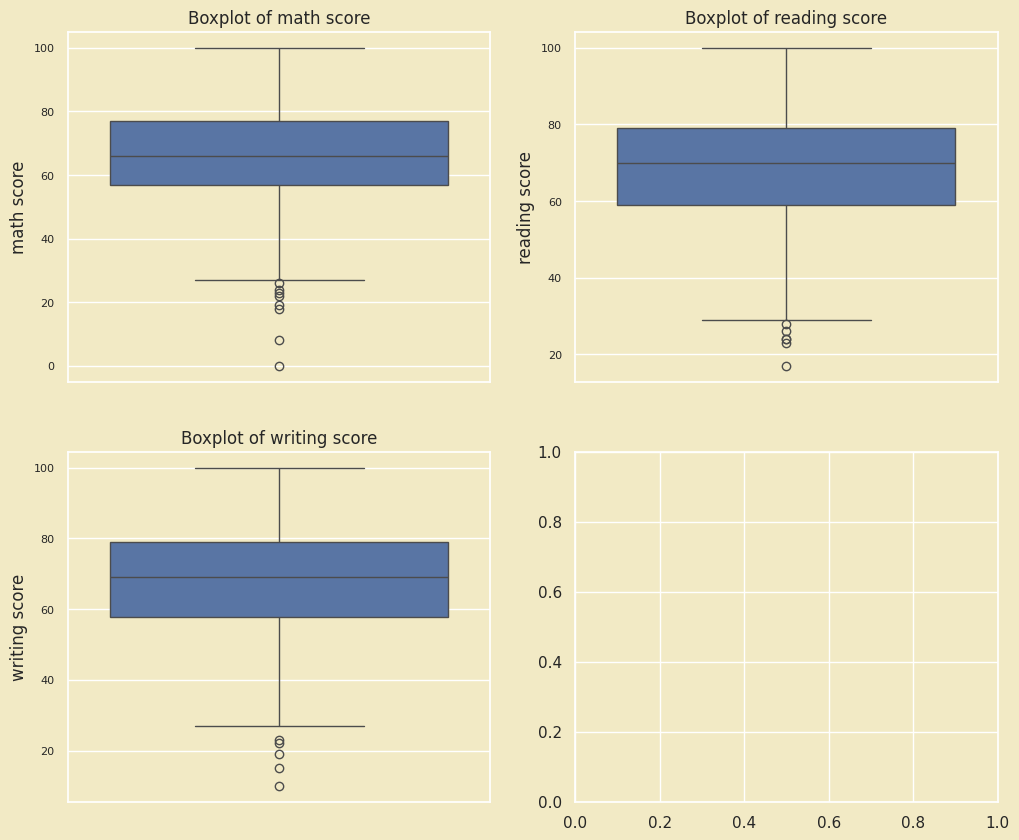

In [121]:
numerical_cols = data.select_dtypes(exclude=['object', 'bool'])
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

num_cols = len(numerical_cols.columns)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols.columns):
    sns.boxplot(y=numerical_cols[col], ax=axes[i])
    axes[i].set_title("Boxplot of" + " " + col)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    

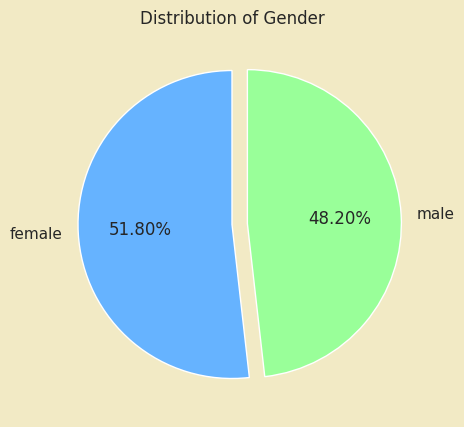

In [122]:
values, counts = np.unique(data['gender'], return_counts=True)
plt.figure(figsize=(5, 5))
explode = [0, 0.1]
colors = ['#66b3ff','#99ff99']
plt.pie(counts, labels=values, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)
plt.title('Distribution of Gender')
plt.show()

#### <b><i>Step 4: Feature Engineering

In [123]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [124]:
data['average_score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)

In [125]:
condition = [
    (data['average_score'] >= 85),
    (data['average_score'] >= 70) & (data['average_score'] < 85),
    (data['average_score'] < 70)
]

choices = [3, 2, 1]
data['performance level'] = np.select(condition, choices, default=np.nan)

In [126]:
from sklearn.preprocessing import LabelEncoder

In [127]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

In [128]:
data.loc[data['parental level of education'] == 'some high school', 'parental level of education'] = 'high school'

In [129]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school'], dtype=object)

In [130]:
data['race/ethnicity'] = data['race/ethnicity'].apply(lambda x: 1 if x=='group A' else 2 if x=='group B' else 3 if x=='group C' else 3 if x=='group D' else 4)

In [131]:
data = pd.get_dummies(data)

In [132]:
for col in data.select_dtypes(exclude='number').columns:
    data[col] = data[col].astype(int)

In [133]:
data.head()

,gender,race/ethnicity,math score,reading score,writing score,average_score,performance level,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,2,72,72,74,72.666667,2.0,0,1,0,0,0,0,1,0,1
1,0,3,69,90,88,82.333333,2.0,0,0,0,0,1,0,1,1,0
2,0,2,90,95,93,92.666667,3.0,0,0,0,1,0,0,1,0,1
3,1,1,47,57,44,49.333333,1.0,1,0,0,0,0,1,0,0,1
4,1,3,76,78,75,76.333333,2.0,0,0,0,0,1,0,1,0,1


#### <b><i>Step 5: Splitting the Data

In [134]:
X = data.drop(columns=['math score'], axis=1)
y = data['math score']

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### <b><i>Step 6: Applying a Machine Learning Model

In [137]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### <b><i>Step 7: Model Evaluation

In [138]:
model.score(X_test, y_test)

1.0

In [139]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test)))

1.0735626242739094e-27


#### <b><i>Step 5 to Step 8 in just two function.

In [140]:
result = Models(data, 'math score', 0.2)

In [141]:
result

,Model,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error,Training Accuracy,Testing Accuracy
0,Linear Regression,5.076478e-28,1.644906e-14,2.253104e-14,1.000000,1.000000
1,Lasso Regression,2.222536e+01,3.756159e+00,4.714378e+00,0.908665,0.900530
2,Ridge Regression,2.242813e-01,3.710298e-01,4.735835e-01,0.999078,0.998894
3,Polynomial Linear Regression,2.158828e-27,3.794298e-14,4.646319e-14,1.000000,1.000000


#### <b><i>Step 8: Model Evaluation

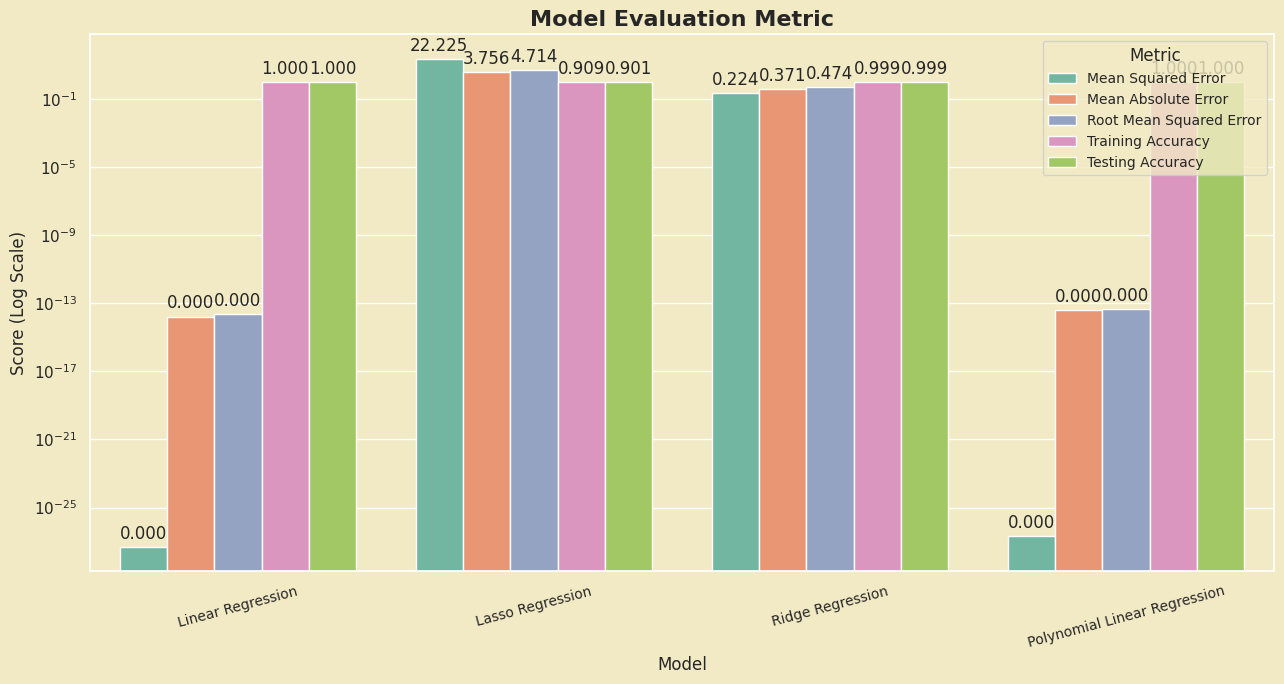

In [146]:
plot_metric(result)